# Author : Bhargav G

# GRIP @ The Sparks Foundation

# Data Science And Business Analysis Internship

# TASK 3 : Exploratory Data Analysis - Retail (Level - Beginner) 

## Step 1:- Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
plt.style.use('seaborn-darkgrid')

## Step 2:- Gathering Data For Analysis

In [6]:
df = pd.read_csv('SampleSuperstore.csv')


In [8]:
#To print a summary of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
#Checking with number of rows and columns in dataset
df.shape

(9994, 13)

In [11]:
#Checking for duplicate entries
df.duplicated().sum()

17

In [12]:
#To drop the duplicate entries
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [13]:
#Checking for Null Values.
print(df.isnull().sum())
print(f"\n\n\n{'0'} indicates that there is not any null value in dataset.")


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64



0 indicates that there is not any null value in dataset.


## Step 3:-Data Visualization

### Based on category, segment, ship mode and region

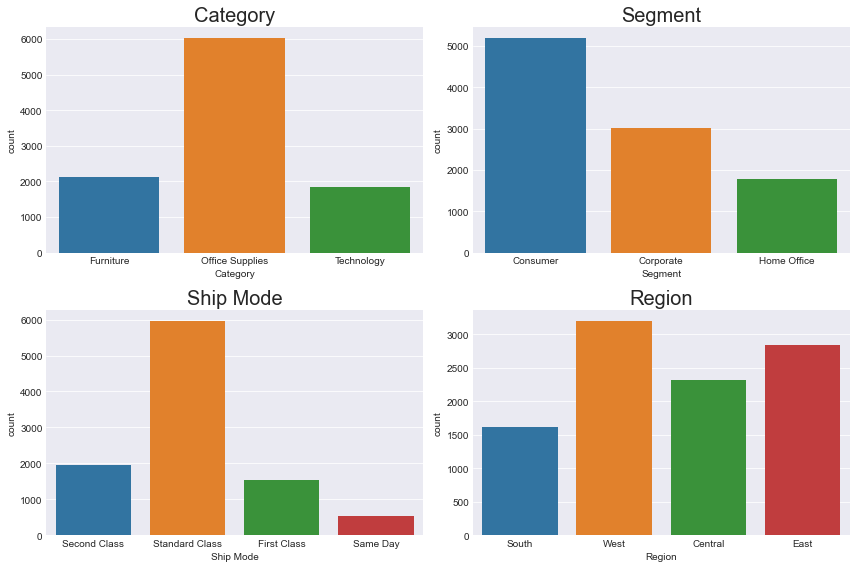

In [15]:
fig,axs = plt.subplots(nrows = 2,ncols = 2,figsize = (12,8));
sns.countplot(df['Category'], ax = axs[0][0])
sns.countplot(df['Segment'], ax = axs[0][1])
sns.countplot(df['Ship Mode'], ax = axs[1][0])
sns.countplot(df['Region'], ax = axs[1][1])
axs[0][0].set_title('Category', fontsize = 20)
axs[0][1].set_title('Segment', fontsize = 20)
axs[1][0].set_title('Ship Mode', fontsize = 20)
axs[1][1].set_title('Region', fontsize = 20)
plt.tight_layout()

### Based on sub-category

Text(0.5, 1.0, 'Sub-Category')

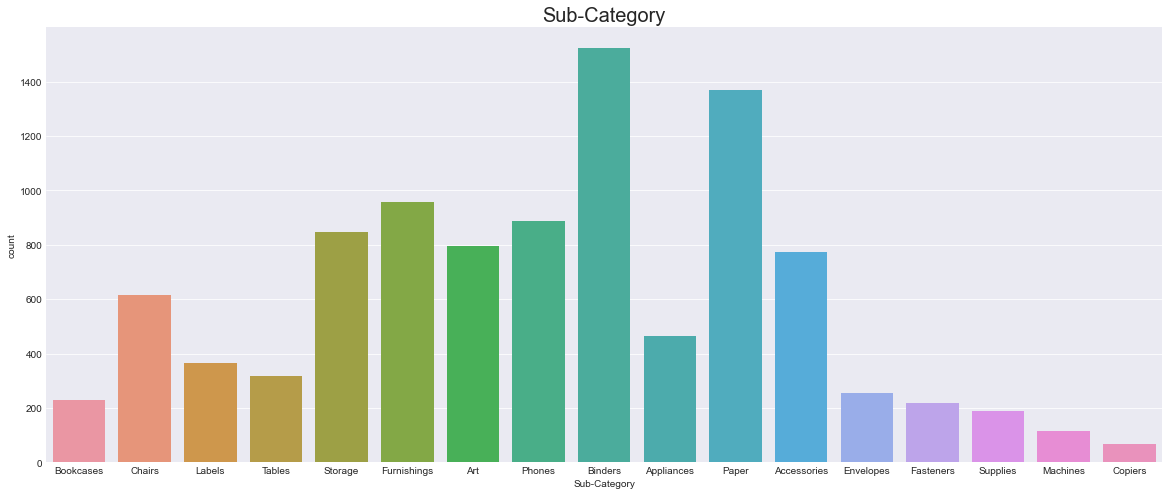

In [16]:
plt.figure(figsize = (20,8))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category', fontsize = 20)

### Based on quantity

Text(0.5, 1.0, 'Quantity')

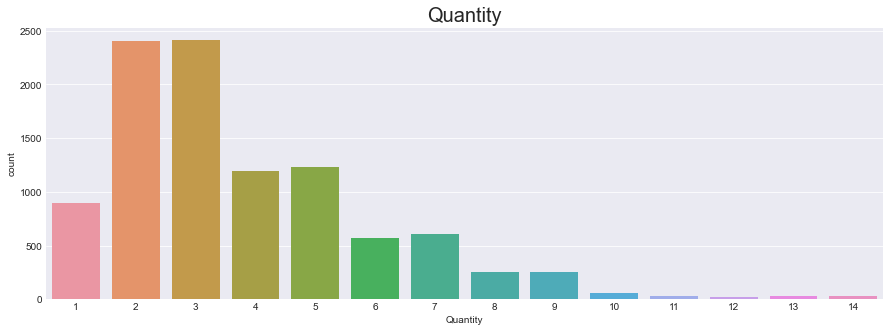

In [17]:
plt.figure(figsize = (15,5))
sns.countplot(df['Quantity'])
plt.title('Quantity', fontsize = 20)


### Based on discount

Text(0.5, 1.0, 'Discount')

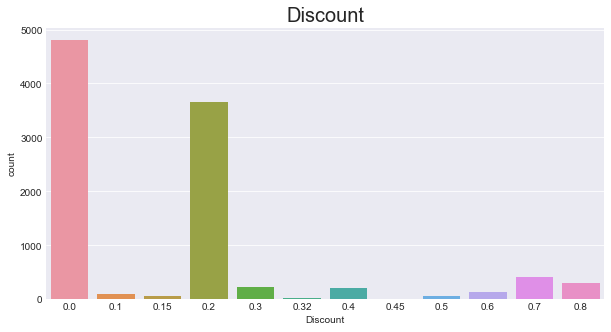

In [18]:
plt.figure(figsize = (10,5))
sns.countplot(df['Discount'])
plt.title('Discount', fontsize = 20)

### To find correlation of dataset

In [19]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

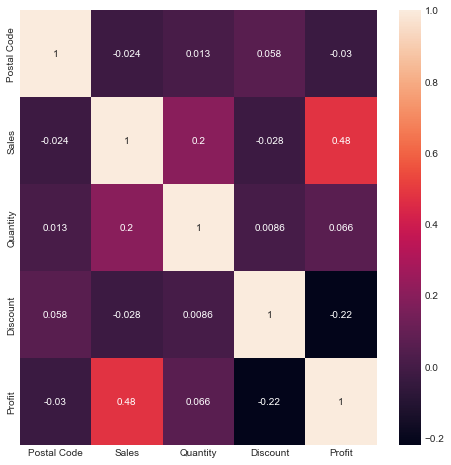

In [20]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr() , annot = True)

From the above heatmap, we can say that sales and profit are moderately correlated. Discount and profit are negatively correlated. Quantity and profit are less moderately correlated

## Step 4:Distribution of Data

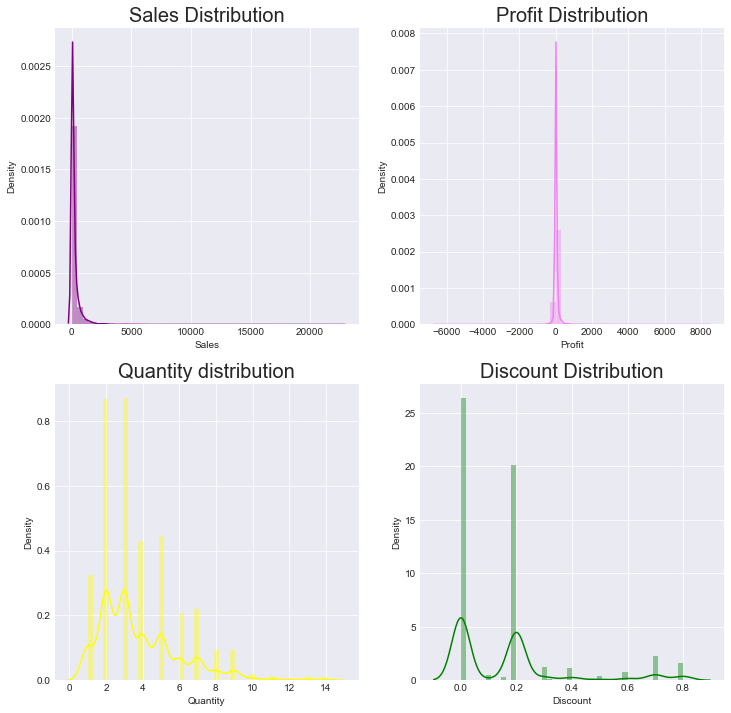

In [23]:
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (12,12))
sns.distplot(df['Sales'], color = 'purple',  ax = axs[0][0])
sns.distplot(df['Profit'], color = 'violet',  ax = axs[0][1])
sns.distplot(df['Quantity'], color = 'yellow',  ax = axs[1][0])
sns.distplot(df['Discount'], color = 'green',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 20)
axs[0][1].set_title('Profit Distribution', fontsize = 20)
axs[1][0].set_title('Quantity distribution', fontsize = 20)
axs[1][1].set_title('Discount Distribution', fontsize = 20)
plt.show()


From above distribution graph we can definitely say, sales distribution is rightly skewed and profit distribution is normally skewed

## Step 5:-State wise analysis

### Based on dealings

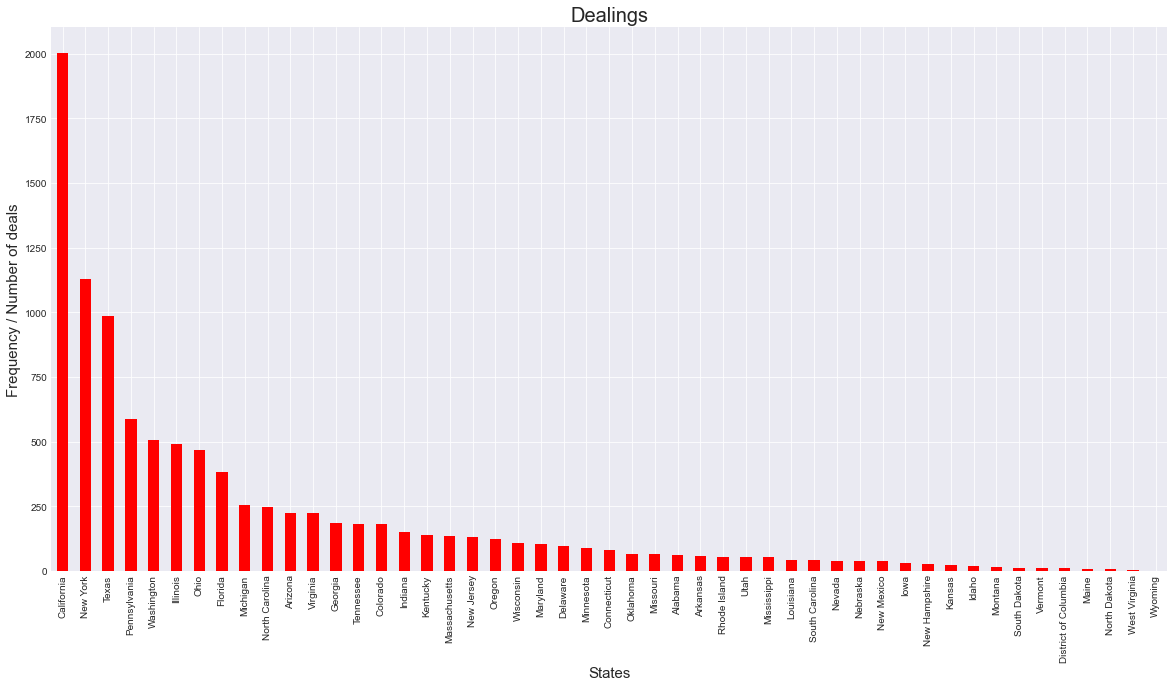

In [26]:
df1 = df['State'].value_counts()
df1.plot(kind = 'bar', figsize = (20,10), color = 'red')
plt.ylabel('Frequency / Number of deals' , size = 15)
plt.xlabel('States' , size = 15)
plt.xticks(rotation = 90)
plt.title('Dealings', fontsize = 20)
plt.show()


From this graph, we can conclude that California has the highest number of deals. States named Maine, North Dakota and West Virginia have little to no less number of deals.

### Based on profit

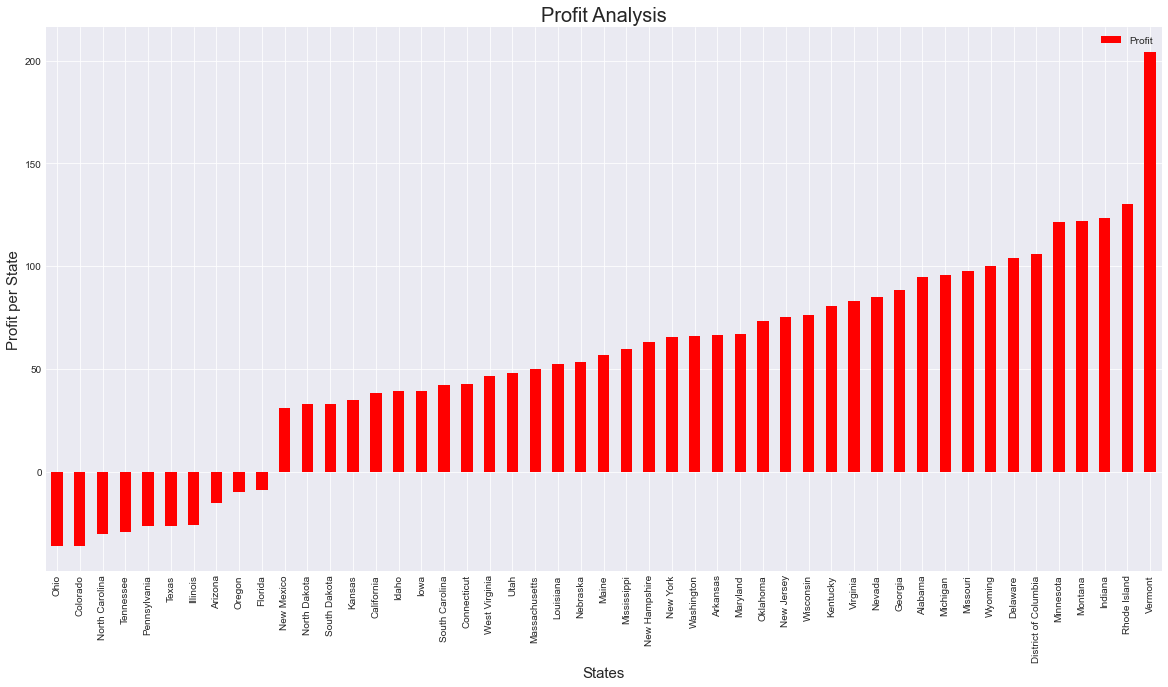

In [28]:
df_state = df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df2 = df_state.sort_values('Profit')
df2[['Profit']].plot(kind = 'bar', figsize = (20,10), color = 'red')
plt.title('Profit Analysis', fontsize = 20)
plt.ylabel('Profit per State' , size = 15)
plt.xlabel('States' , size = 15)
plt.show()

From this graph, we can say that Vermont has the highest profit and Ohio has the lowest profit.

### Based on sale

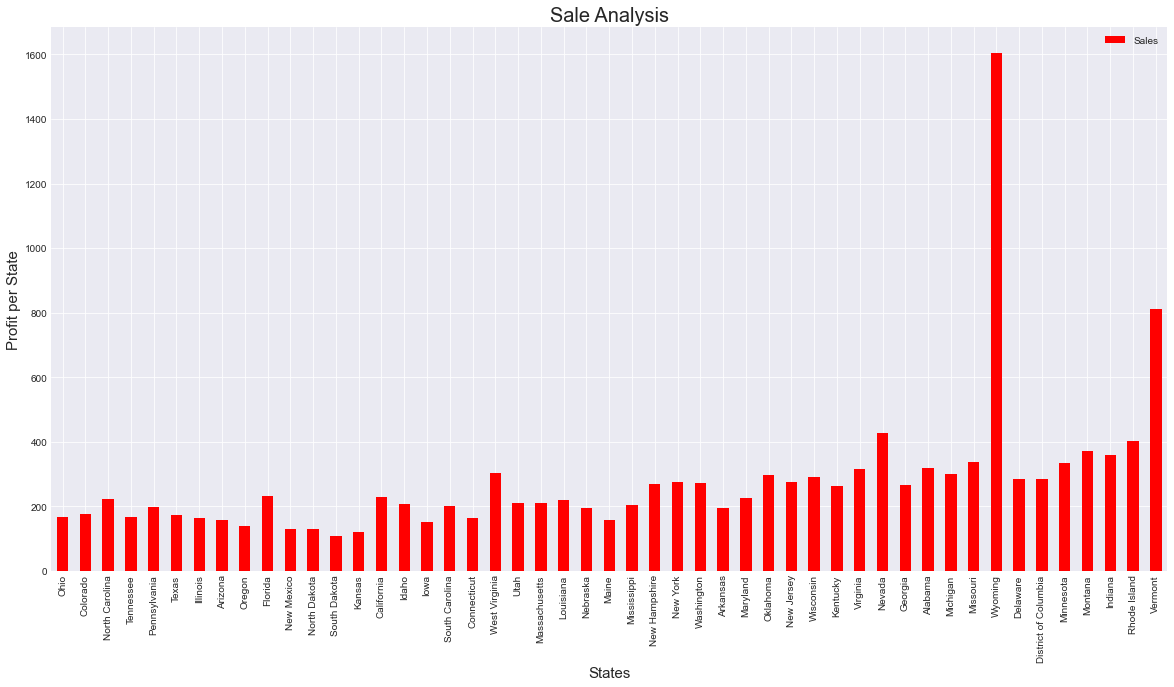

In [29]:
df2[['Sales']].plot(kind = 'bar', figsize = (20,10), color='red')
plt.title('Sale Analysis', fontsize = 20)
plt.ylabel('Profit per State' , size = 15)
plt.xlabel('States', size = 15)
plt.show()

From the above visuals, the highest amount of sales is observed in Wyoming and the lowest amount of sales is seen in South Dakota

### Based on discount

Text(0.5, 1.0, 'Discount analysis')

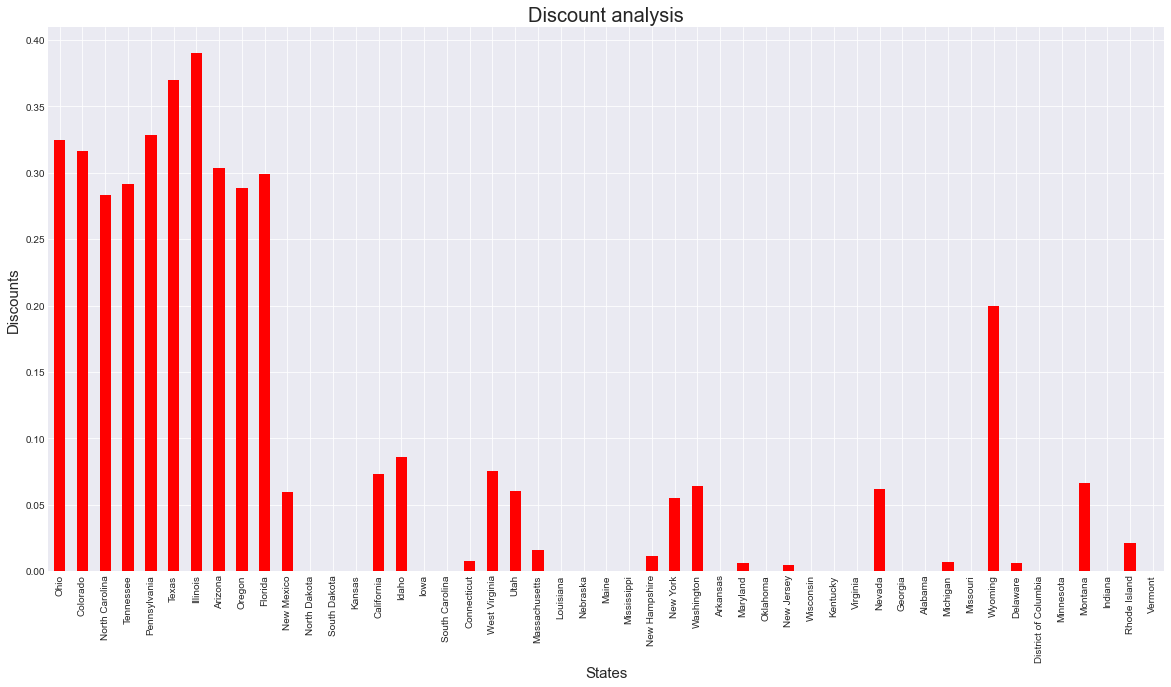

In [30]:
df2['Discount'].plot(kind = 'bar', figsize = (20,10), color = 'red')
plt.ylabel('Discounts' , size = 15)
plt.xlabel('States', size = 15)
plt.title('Discount analysis', fontsize = 20)


State Illinois has the highest discount.

## Step 6:- City wise analysis

### Based on dealings

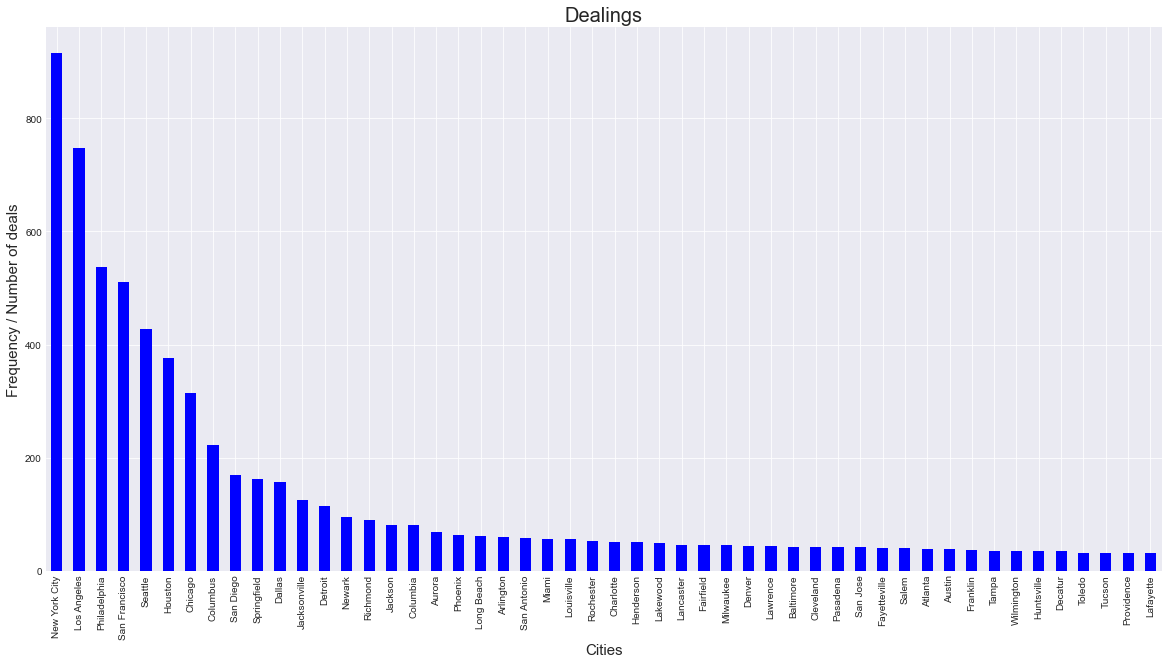

In [31]:
df3 = df['City'].value_counts()
df3=df3.head(50)
df3.plot(kind = 'bar', figsize = (20,10), color = 'blue')
plt.ylabel('Frequency / Number of deals' , size = 15)
plt.xlabel('Cities' , size = 15)
plt.title('Dealings', fontsize = 20)
plt.show()

The highest number of dealings was found in New York City



### Based on profit

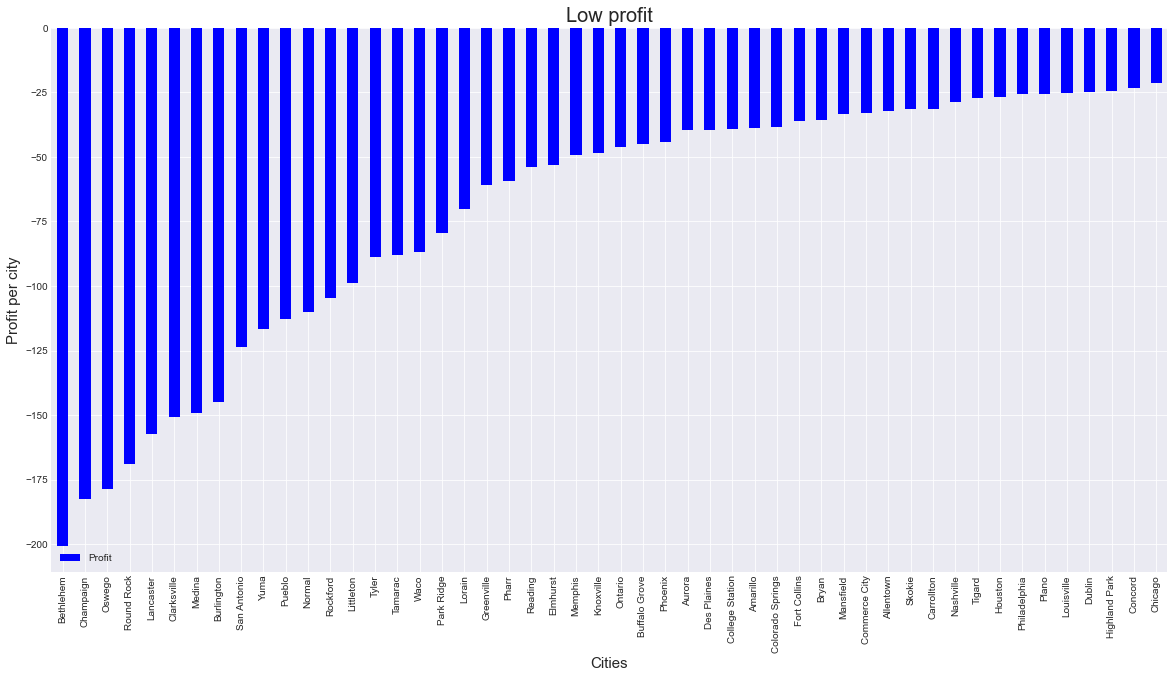

In [32]:
df_city = df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df4 = df_city.sort_values('Profit')
df4[['Profit']].head(50).plot(kind = 'bar', figsize = (20,10), color = 'blue')
plt.title('Low profit', fontsize = 20)
plt.ylabel('Profit per city' , size = 15)
plt.xlabel('Cities' , size = 15)
plt.show()

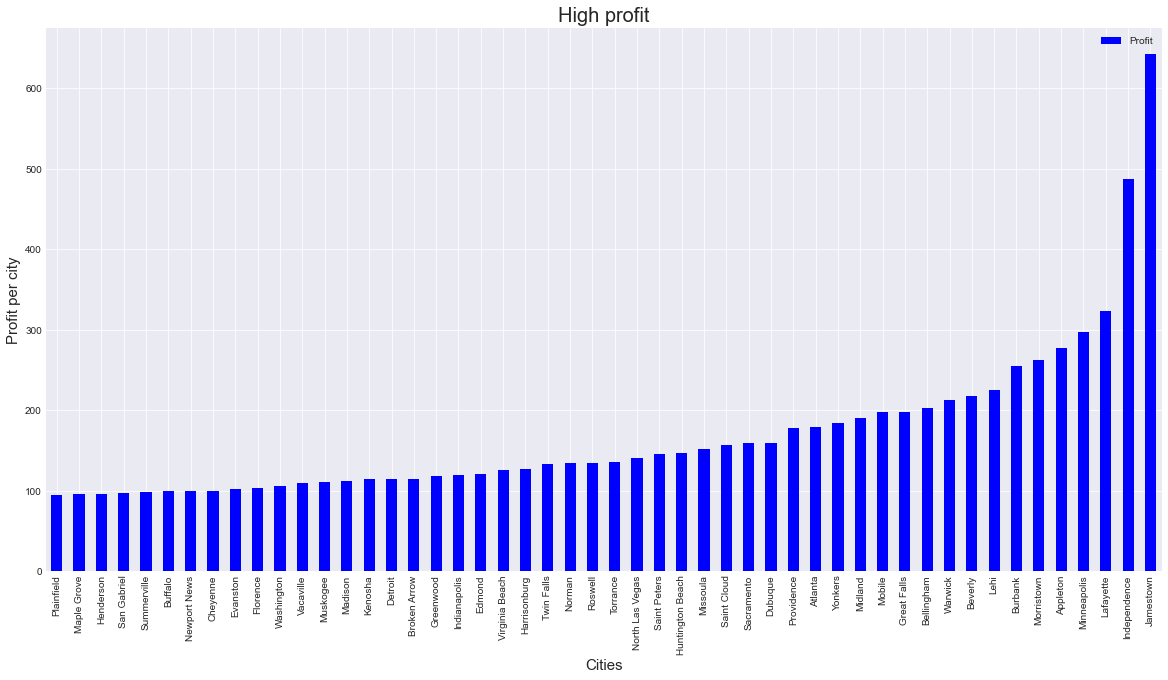

In [33]:
df_city = df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df5 = df_city.sort_values('Profit')
df5[['Profit']].tail(50).plot(kind = 'bar', figsize = (20,10), color = 'blue')
plt.title('High profit', fontsize = 20)
plt.ylabel('Profit per city' , size = 15)
plt.xlabel('Cities' , size = 15)
plt.show()

We can conclude that 50 cities have profit in positive and 50 cities have profit in negative and hence balanced.

### Based on sale

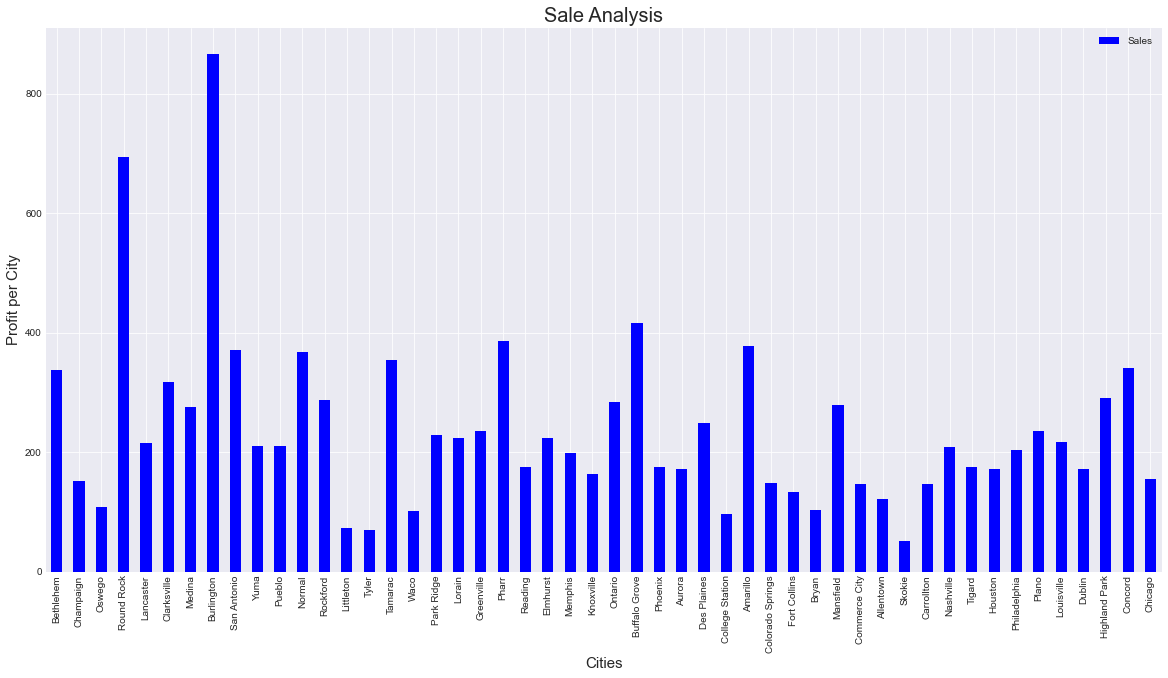

In [34]:
df4[['Sales']].head(50).plot(kind = 'bar', figsize = (20,10), color = 'blue')
plt.title('Sale Analysis', fontsize = 20)
plt.ylabel('Profit per City' , size = 15)
plt.xlabel('Cities', size = 15)
plt.show()

Burlington has the highest number of sales and Skokie has the lowest number of sales

### Based on discount

Text(0.5, 1.0, 'Discount analysis')

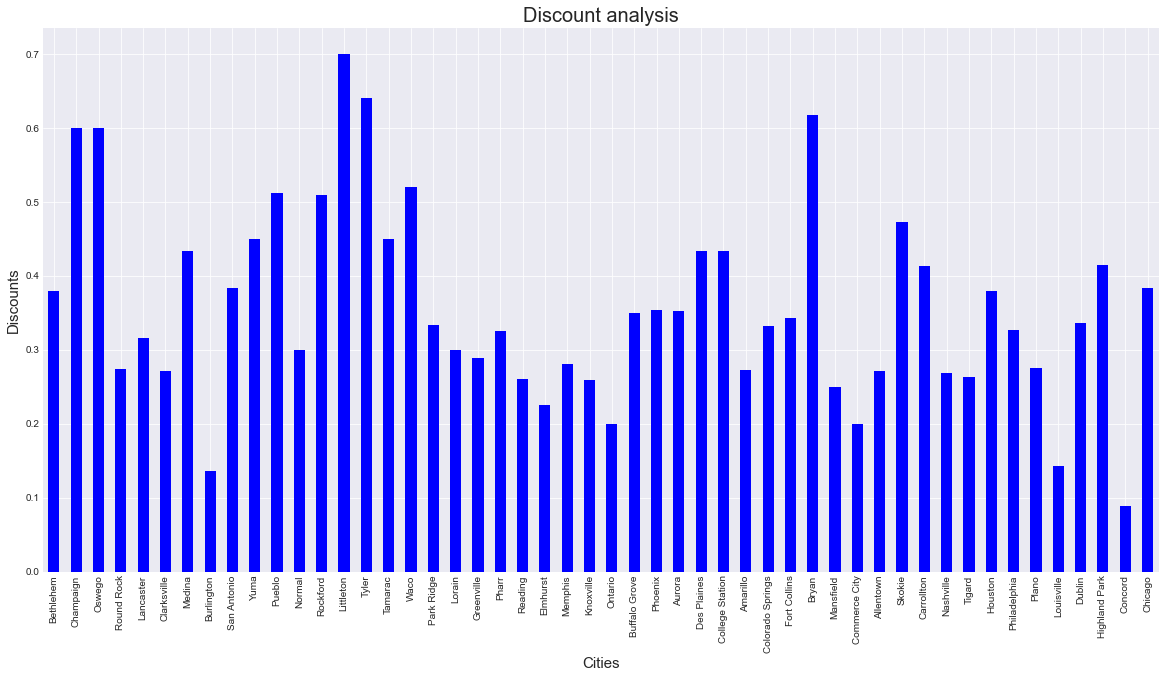

In [35]:
df4['Discount'].head(50).plot(kind = 'bar', figsize = (20,10), color = 'blue')
plt.ylabel('Discounts' , size = 15)
plt.xlabel('Cities', size = 15)
plt.title('Discount analysis', fontsize = 20)

Littleton has the highest discount

## Step 7:- Quantity wise analysis

Text(0.5, 1.0, 'Quantity wise analysis of Sale, Discount, Profit')

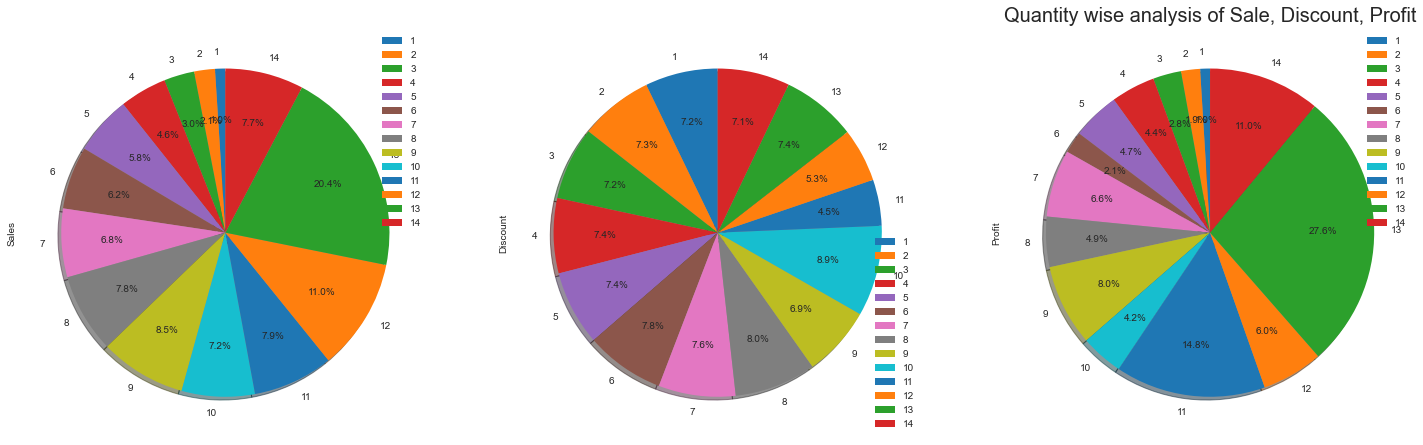

In [36]:
df_quantity = df.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
df_quantity.plot.pie(subplots = True, autopct = '%1.1f%%', figsize = (25, 25), pctdistance = 0.69, startangle = 90, shadow = True, labels = df_quantity.index)
plt.title('Quantity wise analysis of Sale, Discount, Profit' , size = 20)


## Step 8:-Category wise analysis

Text(0.5, 1.0, 'Category wise analysis of Sale, Discount, Profit')

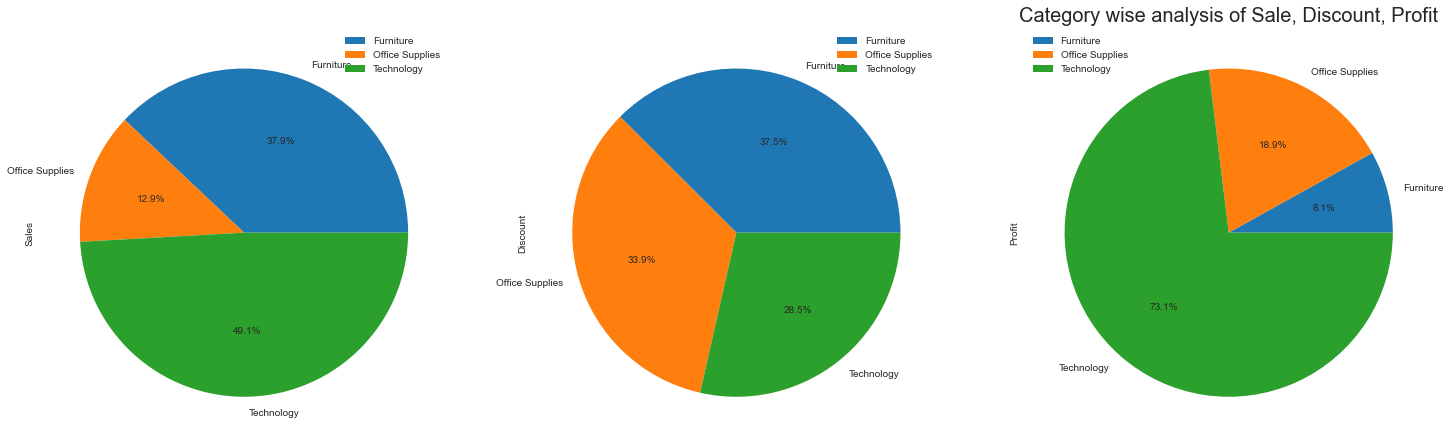

In [37]:
df_category = df.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
df_category.plot.pie(subplots = True, figsize = (25, 25), autopct = '%1.1f%%', labels = df_category.index)
plt.title('Category wise analysis of Sale, Discount, Profit' , size = 20)


## Step 9:-Region wise analysis

Text(0.5, 1.0, 'Region wise analysis of Sale, Discount, Profit')

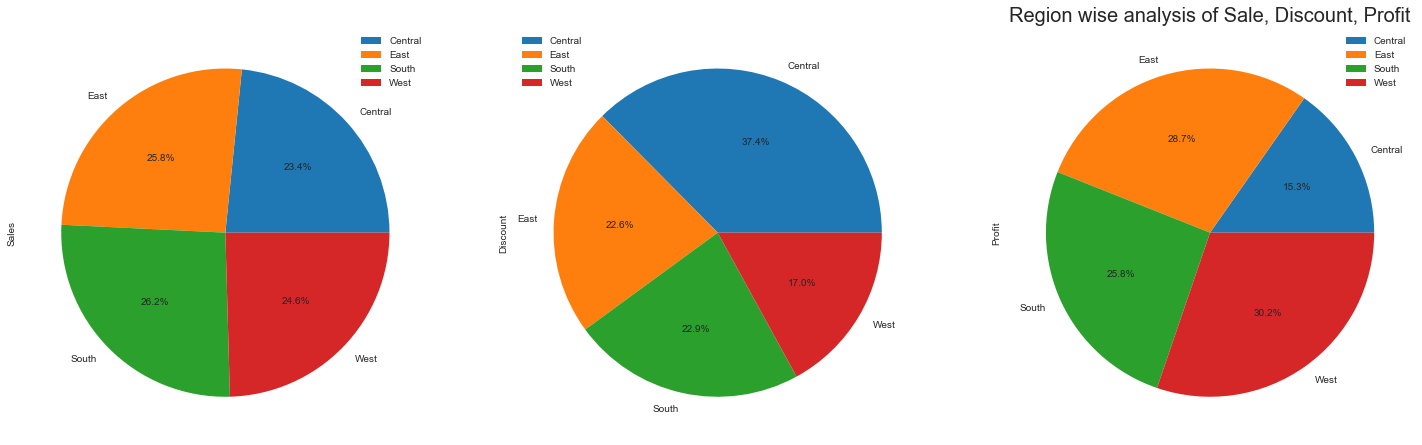

In [38]:
df_region = df.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
df_region.plot.pie(subplots = True, figsize = (25, 25), autopct = '%1.1f%%', labels = df_region.index)
plt.title('Region wise analysis of Sale, Discount, Profit' , size = 20)

## Step 10:-Interdependency of Sales, Profits and Discounts

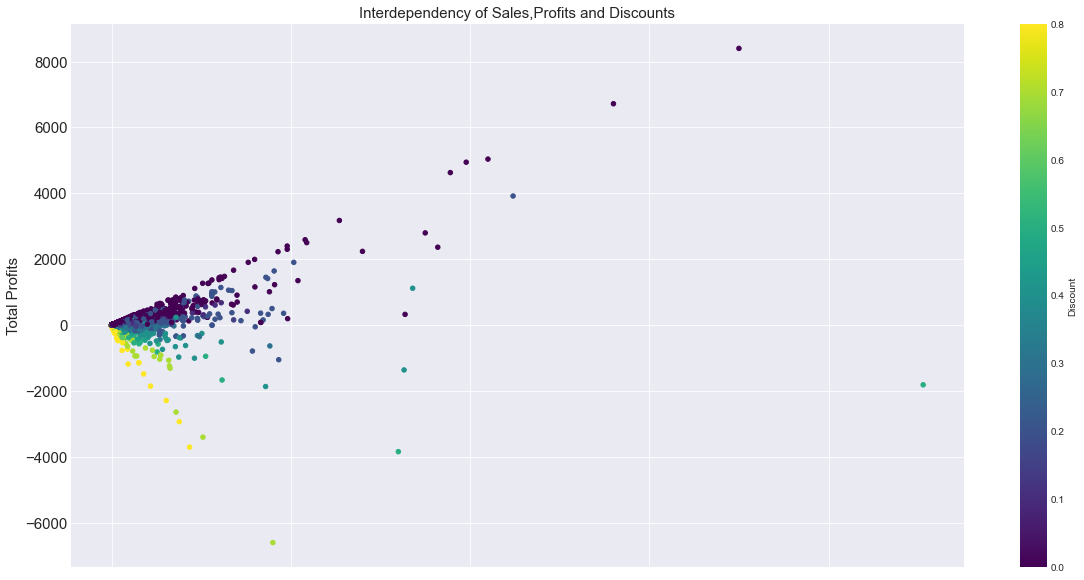

In [39]:
df.plot(kind = "scatter", figsize = (20,10), x = "Sales", y= "Profit", c = "Discount", s = 20, fontsize = 15, colormap = "viridis")
plt.ylabel('Total Profits', fontsize = 15)
plt.title("Interdependency of Sales,Profits and Discounts", fontsize = 15)
plt.show()

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

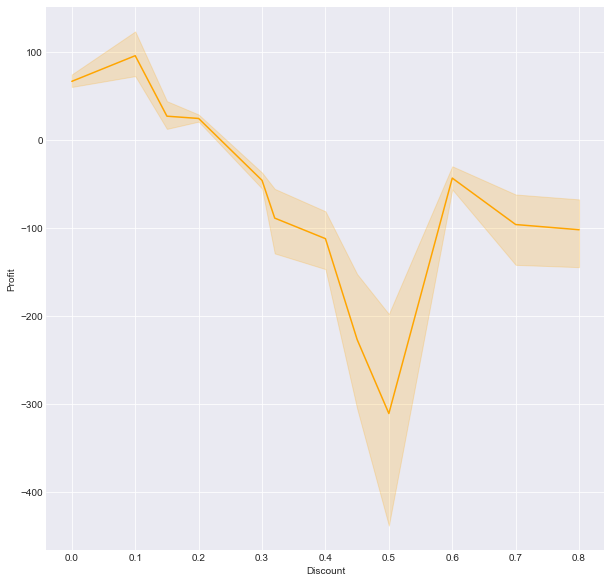

In [40]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Discount', y = 'Profit', color = 'orange', data = df)


## Conclusion:-

#### Some states, like West Virginia, North Dakota, and Wyoming, have very little or no sales. So I have to be considered in these states as a business manager.
#### Since California has the biggest amount of sales, Texas and New York have the highest values of potential customers. Texas and New York can therefore be targeted in order to increase profit.
#### Texas and New York have high prospective client values following California, which has the biggest sales volume. Therefore, Texas and New York can be targeted in order to increase earnings.
#### Southern and central regions have lower sales and profits. Sales and profit will improve by giving customers incentives like discounts. In the consumer segment, the biggest purchases are also made. In order to boost sales and profits, attention should be paid to the corporate and home office divisions.